<a href="https://colab.research.google.com/github/aikene/section-web/blob/master/11_Pima_Indians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Spark 3.0.1 on the Linux VM
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://www-us.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz
!tar xf spark-3.1.1-bin-hadoop2.7.tgz

In [ ]:
# pip install findspark
!pip install -q findspark

In [ ]:
# Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

In [ ]:
# Initialize Spark
import findspark
findspark.init()

# Find Spark
findspark.find()

'/content/spark-3.1.1-bin-hadoop2.7'

In [ ]:
# Mount Google Drive - will ask for verification
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Navigate to proper file location
# cd drive/MyDrive/CSCI\ E-63\ Big\ Data\ Analytics

# !dir

In [ ]:
# Imports
from pyspark.ml.feature import Tokenizer
from pyspark.sql import SparkSession
from pyspark.ml.feature import *
import numpy as np
from pyspark.ml.linalg import *
from pyspark.sql.types import * 
from pyspark.sql.functions import *
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy
from tensorflow.keras.datasets import imdb

In [ ]:
# Start Spark Session
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
# Read Pima Indians  into dataframe
pima_indians_df = spark.read.format("csv") \
                  .option("header", "true") \
                  .option("inferSchema", "true") \
                  .load("/content/drive/MyDrive/CSCI\ E-63\ Big\ Data\ Analytics/pima-indians-diabetes.csv")
        

In [ ]:
# Show Dataframe
pima_indians_df.show()

+--------------+--------+--------------+--------------+-------------+---------------+--------+---+-----+
|Times_pregnant|Glucose |Blood_pressure|Skin_thickness|Serum_insulin|Body_mass_index|Pedigree|Age|Class|
+--------------+--------+--------------+--------------+-------------+---------------+--------+---+-----+
|             6|     148|            72|            35|            0|           33.6|   0.627| 50|    1|
|             1|      85|            66|            29|            0|           26.6|   0.351| 31|    0|
|             8|     183|            64|             0|            0|           23.3|   0.672| 32|    1|
|             1|      89|            66|            23|           94|           28.1|   0.167| 21|    0|
|             0|     137|            40|            35|          168|           43.1|   2.288| 33|    1|
|             5|     116|            74|             0|            0|           25.6|   0.201| 30|    0|
|             3|      78|            50|            32|

In [ ]:
# Turn pyspark dataframe to pandas dataframe
pandas_df = pima_indians_df.toPandas()
dataset = pandas_df.to_numpy()
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
# Fix random seed for reproducibility
np.random.seed(7)

In [ ]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [ ]:
# create model
model = Sequential()
model.add(layers.Dense(12, input_dim=8, activation='relu'))
model.add(layers.Dense(8, activation='relu' ))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)

In [ ]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%% " % (model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.7747

accuracy: 77.47% 


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# create inputs for each row in the problem
row1_input = ([2,125,68,28,34,30.6,0.527,40],
              [1,140,72,23,25,28.6,0.451,41],
              [4,143,75,15,12,21.3,0.472,52],
              [1,92,69,26,84,26.1,0.267,23])
row1_input

([2, 125, 68, 28, 34, 30.6, 0.527, 40],
 [1, 140, 72, 23, 25, 28.6, 0.451, 41],
 [4, 143, 75, 15, 12, 21.3, 0.472, 52],
 [1, 92, 69, 26, 84, 26.1, 0.267, 23])

In [ ]:
# create some predictions using the model
predictions = model.predict_classes(row1_input)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# output
for i in range(len(predictions)):
	print("X=%s, Predicted=%s" % (predictions[i], row1_input[i]))

X=[0], Predicted=[2, 125, 68, 28, 34, 30.6, 0.527, 40]
X=[0], Predicted=[1, 140, 72, 23, 25, 28.6, 0.451, 41]
X=[0], Predicted=[4, 143, 75, 15, 12, 21.3, 0.472, 52]
X=[1], Predicted=[1, 92, 69, 26, 84, 26.1, 0.267, 23]


In [ ]:
len(model.weights)

6

In [ ]:
################################################################################### Problem 2 ############################################################################

movie_reviews_df = spark.read.format("csv") \
                    .option("header", "true") \
                    .option("inferSchema", "true") \
                    .load("/content/drive/MyDrive/CSCI\ E-63\ Big\ Data\ Analytics/The_latest_reviews.csv")
movie_reviews_df.show(24, False)

+------+---------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------+
|Rating|Movie                                                                |Review                                                                                                                                         |
+------+---------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------+
|-0.75 |The Rookies                                                          |"""There's such passion behind this terrible script that you want to love it."""                                                               |
|-1.0  |What's Love Got To Do With It?                                       |"""The two leads turn in power

In [ ]:
# Classify Movie reviews
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# We decode the review; indices are offset by 3
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

1646592/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
# One-Hot Encoding
def vectorize_sequences(sequences, dimension=10000):
  # Create an all-zero matrix of shape (len(sequences), dimension)
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. # set specific indices of results[i] to 1s
  return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# Create model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

movie_model = models.Sequential(name = 'movie_review')
movie_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
movie_model.add(layers.Dense(16, activation='relu'))
movie_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Loss function and Optimizer
movie_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Training results, validating the approcach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = movie_model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.6925 - accuracy: 0.5129 - val_loss: 0.6886 - val_accuracy: 0.5494
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.6864 - accuracy: 0.5628 - val_loss: 0.6817 - val_accuracy: 0.5930
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.6773 - accuracy: 0.6154 - val_loss: 0.6703 - val_accuracy: 0.6411
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.6653 - accuracy: 0.6609 - val_loss: 0.6550 - val_accuracy: 0.6897
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.6486 - accuracy: 0.7034 - val_loss: 0.6386 - val_accuracy: 0.7198
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.6307 - accuracy: 0.7366 - val_loss: 0.6212 - val_accuracy: 0.7433
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.6128 - accuracy: 0.7596 - val_loss: 0.6034 - val_accuracy: 0.7605
Epoch 8/20
30

In [ ]:
# History object
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

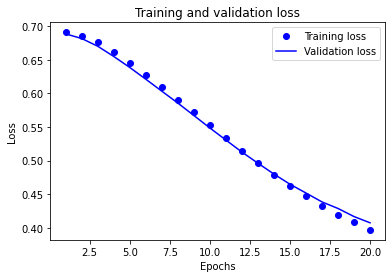

In [ ]:
import matplotlib.pyplot as plt

# Training and validation loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

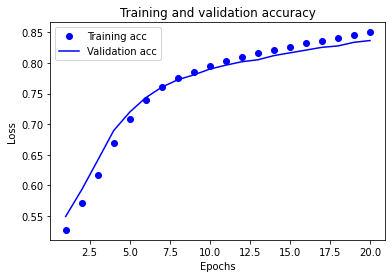

In [ ]:
# Clear plot
plt.clf() 
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Create a predictable array
predict = movie_reviews_df.select('rating').collect()
predict

[Row(rating=-0.75),
 Row(rating=-1.0),
 Row(rating=0.25),
 Row(rating=-1.0),
 Row(rating=-0.75),
 Row(rating=1.0),
 Row(rating=1.0),
 Row(rating=-0.75),
 Row(rating=-0.9),
 Row(rating=-0.7),
 Row(rating=1.0),
 Row(rating=1.0),
 Row(rating=1.0),
 Row(rating=-1.0),
 Row(rating=-1.0),
 Row(rating=1.0),
 Row(rating=1.0),
 Row(rating=1.0),
 Row(rating=1.0),
 Row(rating=1.0),
 Row(rating=-1.0),
 Row(rating=1.0),
 Row(rating=1.0),
 Row(rating=1.0),
 Row(rating=1.0)]

In [ ]:
# create some predictions using the model
predictions = movie_model.predict_classes(row1_input)

# output
for i in range(len(predictions)):
	print("X=%s, Predicted=%s" % (predictions[i], row1_input[i]))